In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns

In [2]:
account = pd.read_csv("/kaggle/input/fraud-detection-dataset/Data/Customer Profiles/account_activity.csv")
customer = pd.read_csv("/kaggle/input/fraud-detection-dataset/Data/Customer Profiles/customer_data.csv")
fraud = pd.read_csv("/kaggle/input/fraud-detection-dataset/Data/Fraudulent Patterns/fraud_indicators.csv")
suspision = pd.read_csv("/kaggle/input/fraud-detection-dataset/Data/Fraudulent Patterns/suspicious_activity.csv")
merchant = pd.read_csv("/kaggle/input/fraud-detection-dataset/Data/Merchant Information/merchant_data.csv")
tran_cat = pd.read_csv("/kaggle/input/fraud-detection-dataset/Data/Merchant Information/transaction_category_labels.csv")
amount = pd.read_csv("/kaggle/input/fraud-detection-dataset/Data/Transaction Amounts/amount_data.csv")
anamoly = pd.read_csv("/kaggle/input/fraud-detection-dataset/Data/Transaction Amounts/anomaly_scores.csv")
tran_data = pd.read_csv("/kaggle/input/fraud-detection-dataset/Data/Transaction Data/transaction_metadata.csv")
tran_rec = pd.read_csv("/kaggle/input/fraud-detection-dataset/Data/Transaction Data/transaction_records.csv")

In [3]:
data = [account,customer,fraud,suspision,merchant,tran_cat,amount,anamoly,tran_data,tran_rec]

In [4]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [5]:
costumer_data = pd.merge(customer, account, on='CustomerID')
costumer_data = pd.merge(costumer_data, suspision, on='CustomerID')
costumer_data

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22,0
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23,0
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24,0
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25,0


In [6]:
transaction_data1 = pd.merge(fraud, tran_cat, on="TransactionID")
transaction_data2 = pd.merge(amount, anamoly, on="TransactionID")
transaction_data3 = pd.merge(tran_data, tran_rec, on="TransactionID")
transaction_data = pd.merge(transaction_data1, transaction_data2,on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_data3,on="TransactionID")

In [7]:
transaction_data


,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928


In [8]:
data = pd.merge(transaction_data, costumer_data,on="CustomerID")
data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
1,895,0,Food,90.422026,0.040817,2022-02-07 06:00:00,2149,53.683898,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
2,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0
3,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
4,544,0,Retail,20.295348,0.476812,2022-01-23 15:00:00,2643,52.991184,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,986,0,Other,89.972362,0.285603,2022-02-11 01:00:00,2036,29.328815,1706,Customer 1706,45,Address 1706,1678.514968,2023-12-07,0
996,989,0,Food,17.848481,0.029543,2022-02-11 04:00:00,2284,20.443811,1312,Customer 1312,26,Address 1312,6018.443647,2022-11-08,0
997,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411,Customer 1411,19,Address 1411,1290.323059,2023-02-15,0
998,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566,Customer 1566,39,Address 1566,7067.831609,2023-07-20,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1000 non-null   int64  
 1   FraudIndicator     1000 non-null   int64  
 2   Category           1000 non-null   object 
 3   TransactionAmount  1000 non-null   float64
 4   AnomalyScore       1000 non-null   float64
 5   Timestamp          1000 non-null   object 
 6   MerchantID         1000 non-null   int64  
 7   Amount             1000 non-null   float64
 8   CustomerID         1000 non-null   int64  
 9   Name               1000 non-null   object 
 10  Age                1000 non-null   int64  
 11  Address            1000 non-null   object 
 12  AccountBalance     1000 non-null   float64
 13  LastLogin          1000 non-null   object 
 14  SuspiciousFlag     1000 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 117.3+ KB


In [10]:
data.shape

(1000, 15)

In [11]:
data.describe()

,TransactionID,FraudIndicator,TransactionAmount,AnomalyScore,MerchantID,Amount,CustomerID,Age,AccountBalance,SuspiciousFlag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.045000,55.853826,0.492282,2504.701000,55.394871,1496.626000,39.848000,5715.455931,0.025000
std,288.819436,0.207408,26.093606,0.288423,288.414883,25.070809,289.229047,13.074932,2540.517262,0.156203
min,1.000000,0.000000,10.057864,0.000234,2001.000000,10.006933,1001.000000,18.000000,1056.301181,0.000000
25%,250.750000,0.000000,33.875129,0.251802,2254.500000,34.502315,1239.000000,29.000000,3489.554711,0.000000
50%,500.500000,0.000000,55.958313,0.490242,2500.500000,57.844325,1501.000000,39.000000,5753.007775,0.000000
75%,750.250000,0.000000,77.589391,0.741888,2761.250000,75.858576,1739.250000,51.000000,7925.710167,0.000000
max,1000.000000,1.000000,99.784323,0.999047,3000.000000,99.887410,2000.000000,64.000000,9999.776239,1.000000


In [12]:

data.columns

Index(['TransactionID', 'FraudIndicator', 'Category', 'TransactionAmount',
       'AnomalyScore', 'Timestamp', 'MerchantID', 'Amount', 'CustomerID',
       'Name', 'Age', 'Address', 'AccountBalance', 'LastLogin',
       'SuspiciousFlag'],
      dtype='object')

In [13]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['TransactionID', 'FraudIndicator', 'TransactionAmount', 'AnomalyScore', 'MerchantID', 'Amount', 'CustomerID', 'Age', 'AccountBalance', 'SuspiciousFlag']
['Category', 'Timestamp', 'Name', 'Address', 'LastLogin']


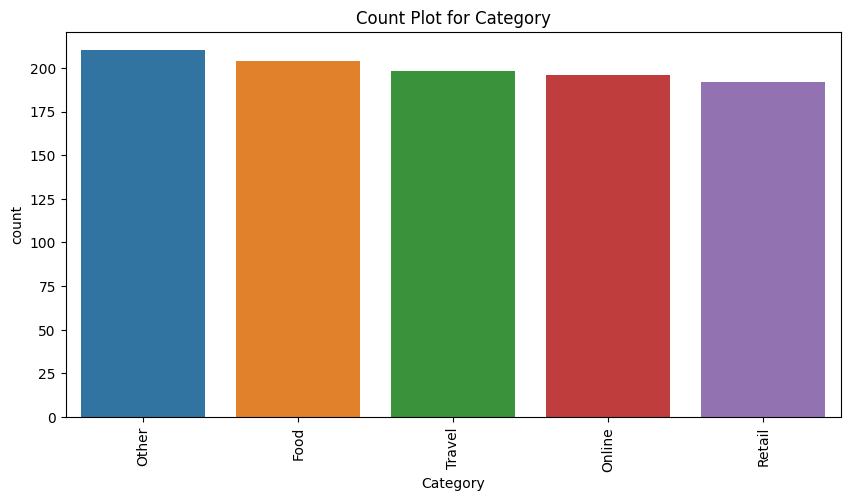

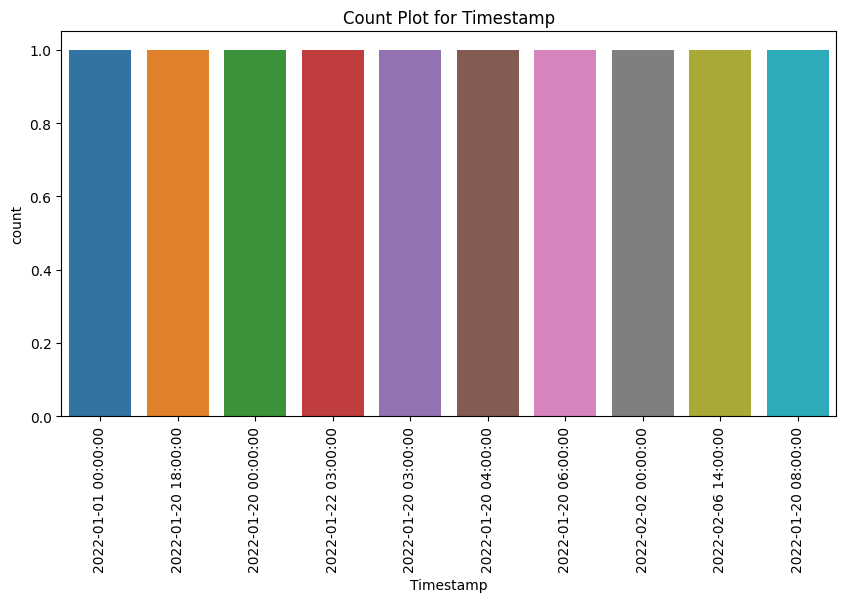

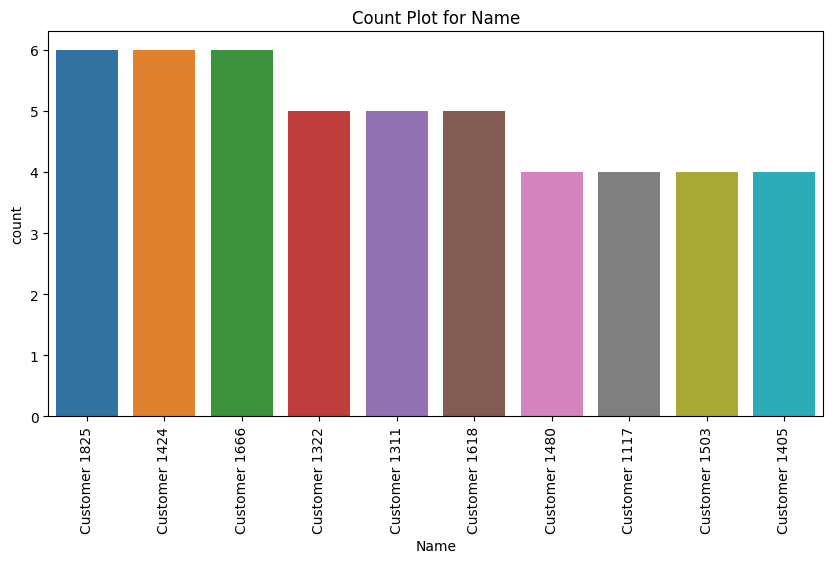

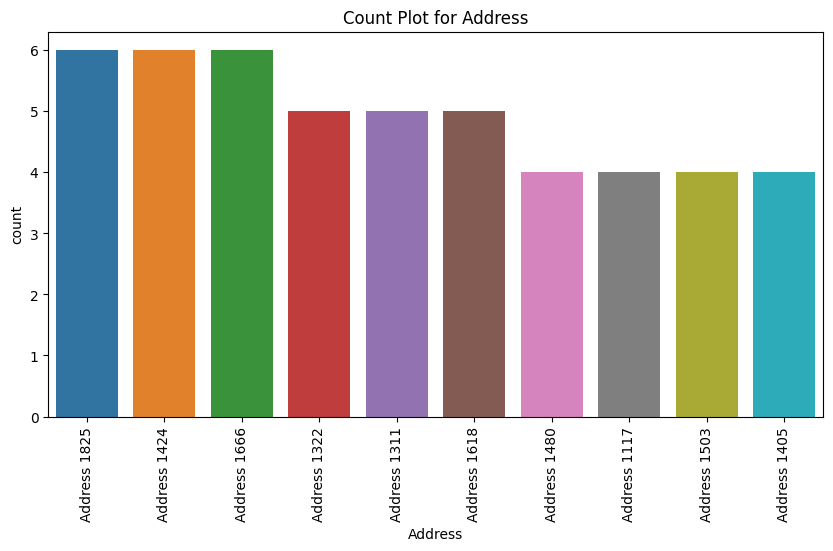

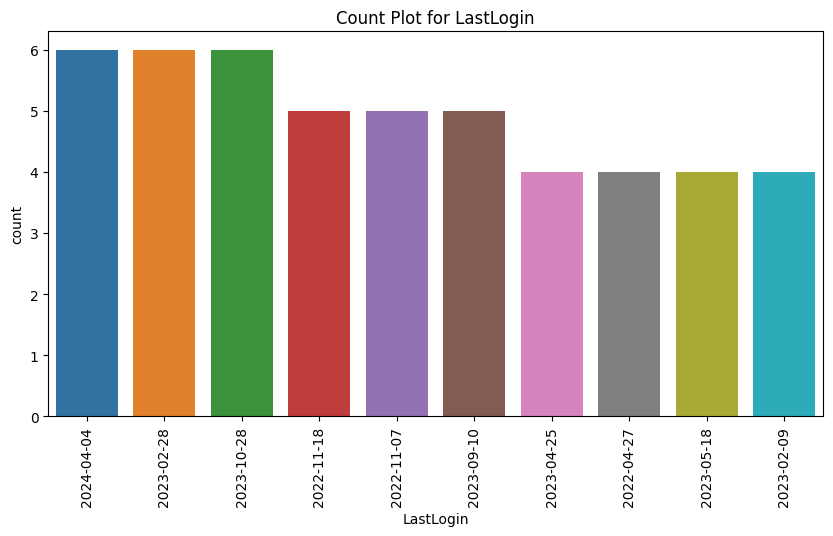

In [14]:
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column has a categorical data type
        top_10_values = data[column].value_counts().head(10)  # Get the first 10 unique values and their counts
        plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
        sns.countplot(x=column, data=data, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
        plt.show()


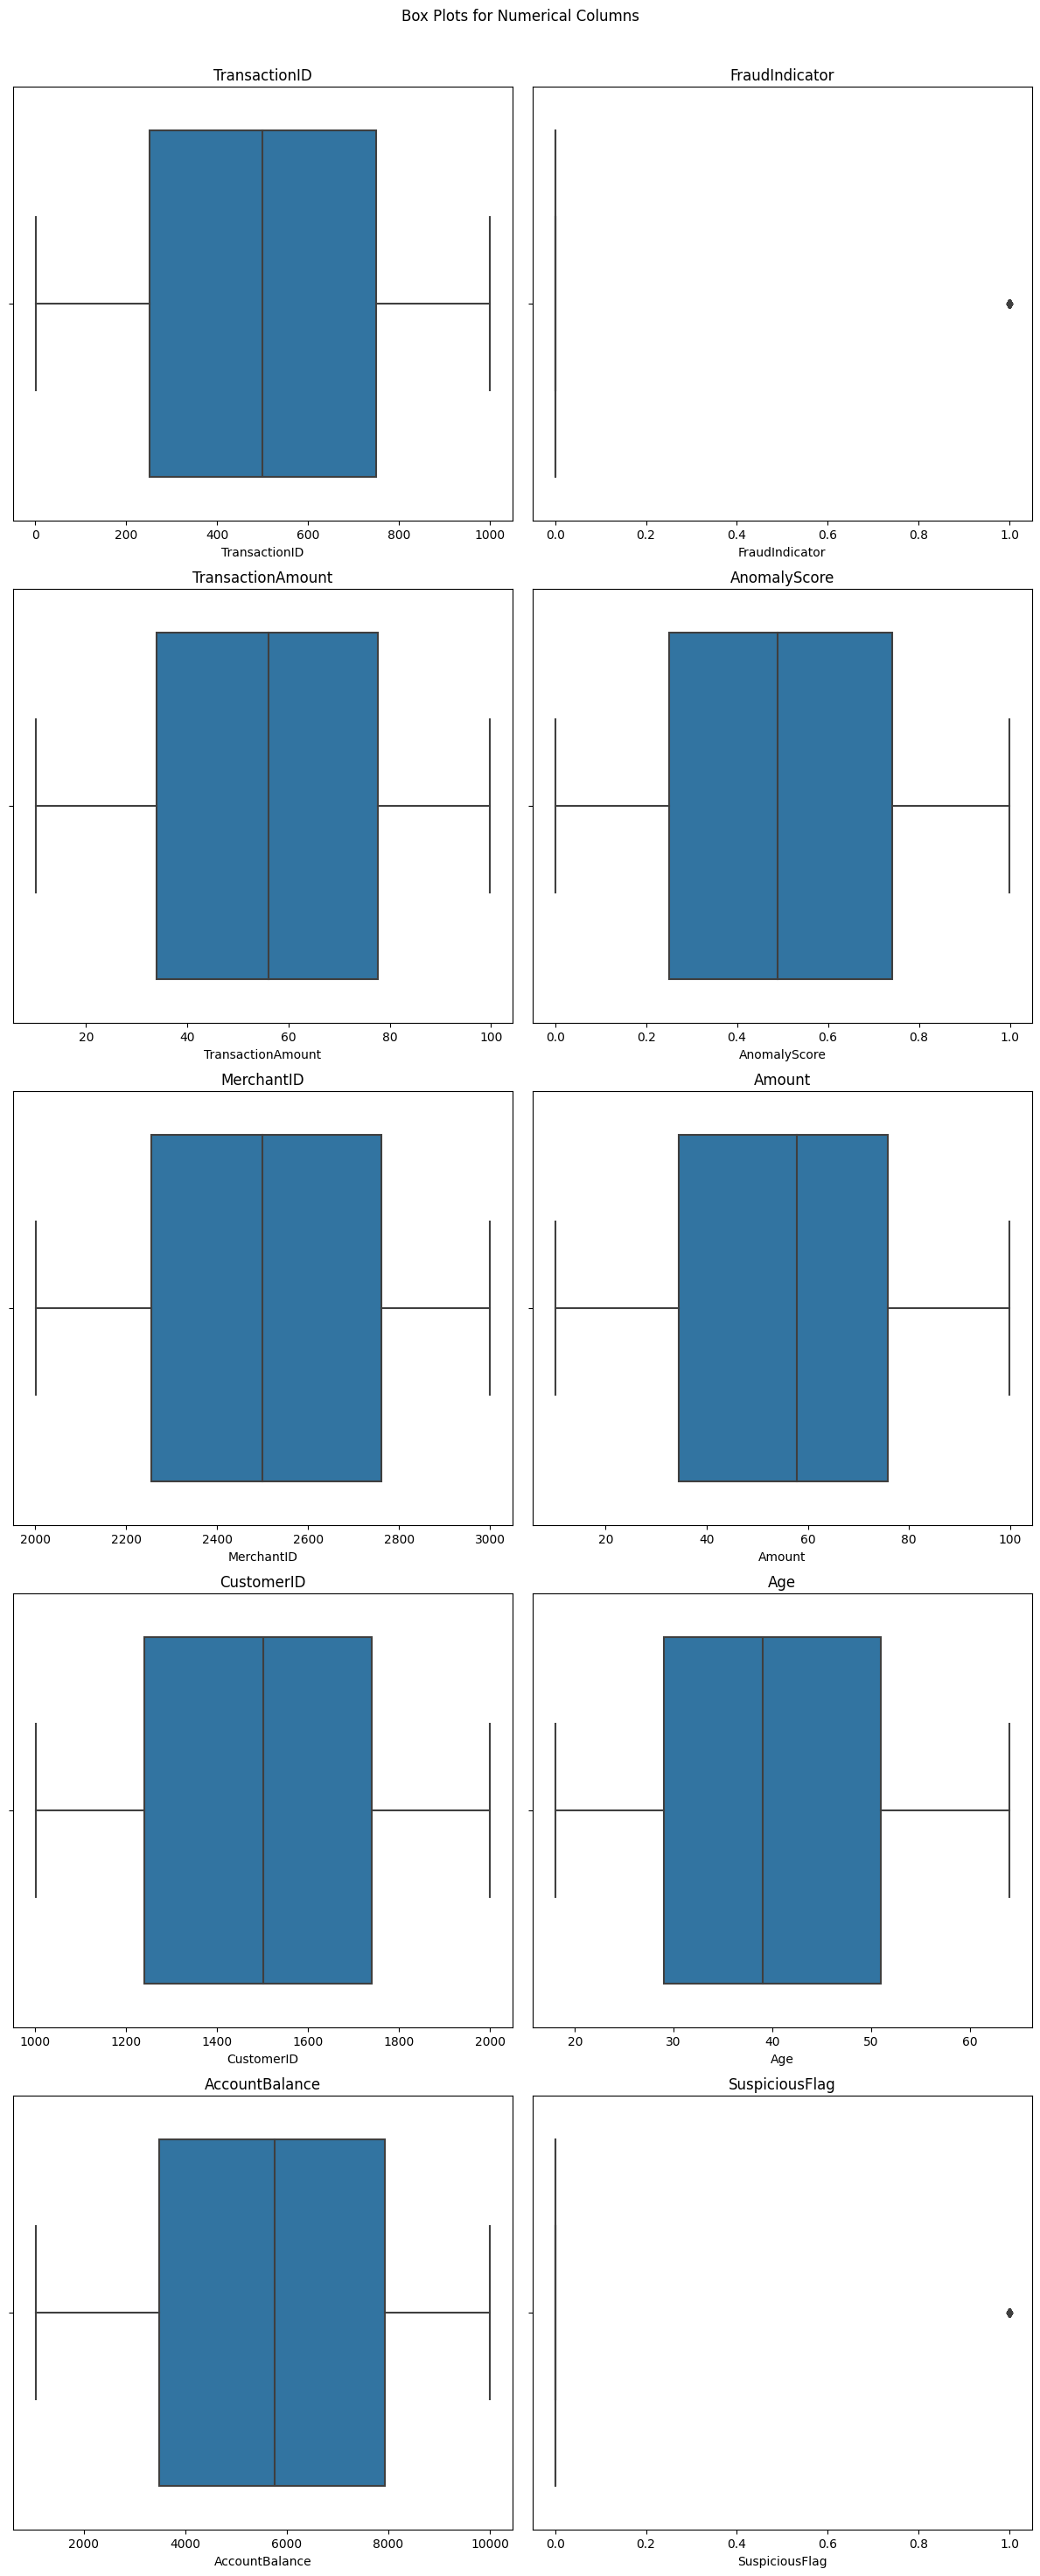

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing numerical columns

# Get the number of numerical columns
num_cols = len(data.select_dtypes(include=['number']).columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

# Loop through the numerical columns and create box plots
for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()


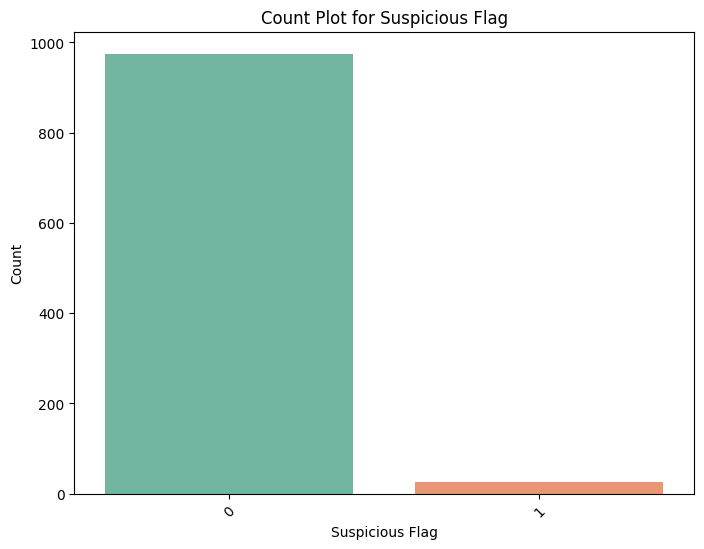

In [16]:
# We should use countplot for SuspiciousFlag feature

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')  # You can change the palette as desired
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long

plt.show()

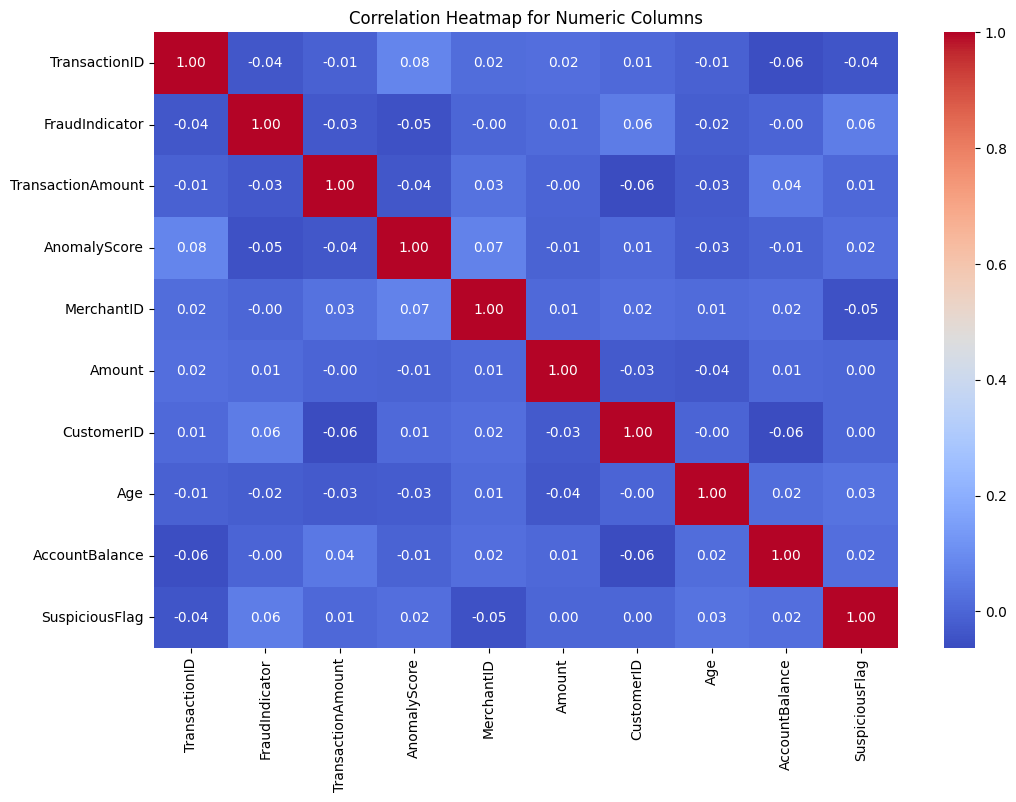

In [17]:

# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')

plt.show()


In [18]:
# Dropping the columns as of now they are not mush corelated & also wouldn't damper the performance of model

columns_to_be_dropped = ['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address']

In [19]:
data1 = data.drop(columns_to_be_dropped, axis=1)
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0
1,0,Food,90.422026,0.040817,2022-02-07 06:00:00,53.683898,2869.689912,2024-08-09,0
2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0
3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0
4,0,Retail,20.295348,0.476812,2022-01-23 15:00:00,52.991184,9288.355525,2024-08-12,0


In [20]:
data1['FraudIndicator'].value_counts(), data1['SuspiciousFlag'].value_counts(), data1['Category'].value_counts()

(FraudIndicator
 0    955
 1     45
 Name: count, dtype: int64,
 SuspiciousFlag
 0    975
 1     25
 Name: count, dtype: int64,
 Category
 Other     210
 Food      204
 Travel    198
 Online    196
 Retail    192
 Name: count, dtype: int64)

In [21]:
# Using Feature Engineering Creating two Columns
# Hour of Transaction = hour
# Gap between the day of transaction and last login in days = gap
if pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
    print("The 'Timestamp' column is already in datetime format.")
else:
    print("The 'Timestamp' column is not in datetime format.")

The 'Timestamp' column is not in datetime format.


Converting TimeStamp to datetime format

In [22]:
data1['Timestamp1'] = pd.to_datetime(data1['Timestamp'])

print(data1.dtypes)

FraudIndicator                int64
Category                     object
TransactionAmount           float64
AnomalyScore                float64
Timestamp                    object
Amount                      float64
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
Timestamp1           datetime64[ns]
dtype: object


In [23]:
data1['Hour'] = data1['Timestamp1'].dt.hour

In [24]:
data1['LastLogin'] = pd.to_datetime(data1['LastLogin'])

In [25]:
data1['gap'] = (data1['Timestamp1'] - data1['LastLogin']).dt.days.abs()

In [26]:
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag,Timestamp1,Hour,gap
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0,2022-01-01 00:00:00,0,951
1,0,Food,90.422026,0.040817,2022-02-07 06:00:00,53.683898,2869.689912,2024-08-09,0,2022-02-07 06:00:00,6,914
2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0,2022-01-01 01:00:00,1,26
3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0,2022-01-01 02:00:00,2,954
4,0,Retail,20.295348,0.476812,2022-01-23 15:00:00,52.991184,9288.355525,2024-08-12,0,2022-01-23 15:00:00,15,932


In [27]:
X = data1.drop(['FraudIndicator','Timestamp','Timestamp1','LastLogin'],axis=1)
Y = data1['FraudIndicator']

In [28]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
X['Category'] = label_encoder.fit_transform(X['Category'])
X

,Category,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag,Hour,gap
0,2,79.413607,0.686699,55.530334,2869.689912,0,0,951
1,0,90.422026,0.040817,53.683898,2869.689912,0,6,914
2,1,12.053087,0.081749,12.881180,9527.947107,0,1,26
3,4,33.310357,0.023857,50.176322,9288.355525,0,2,954
4,3,20.295348,0.476812,52.991184,9288.355525,0,15,932
...,...,...,...,...,...,...,...,...
995,2,89.972362,0.285603,29.328815,1678.514968,0,1,664
996,0,17.848481,0.029543,20.443811,6018.443647,0,4,270
997,0,89.457059,0.266778,19.876750,1290.323059,0,11,369
998,3,47.958030,0.512483,96.299792,7067.831609,0,12,524


train,test,splitting the data

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [30]:
X_train.shape,Y_test.shape

((800, 8), (200,))

In [31]:
# Logistic Regression model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a logistic regression model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.92


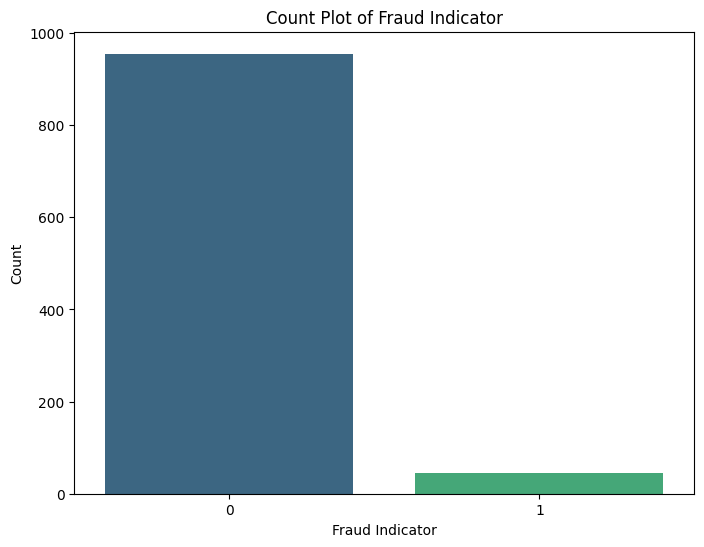

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'FraudIndicator' column
# Load your data into the DataFrame if not already done

# Create a count plot for the 'FraudIndicator' column
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.countplot(data=data1, x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()


Class distribution after oversampling: Counter({0: 955, 1: 955})


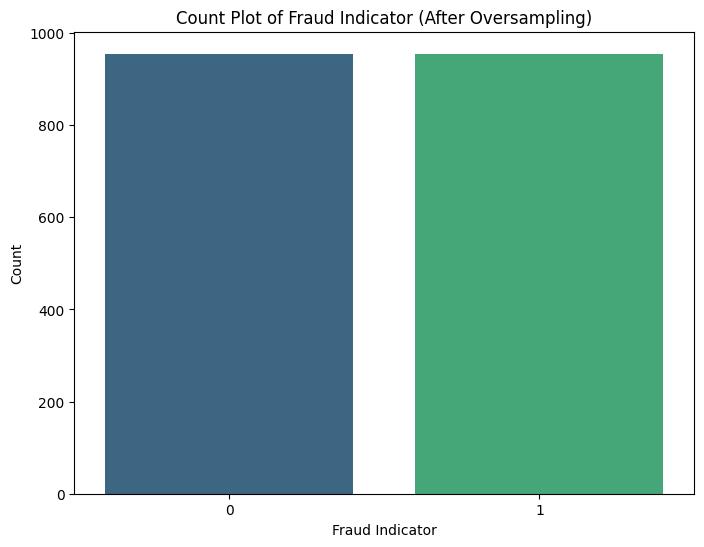

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter


# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

# Create a count plot for the 'FraudIndicator' column after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(data=pd.DataFrame({'FraudIndicator': y_resampled}), x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator (After Oversampling)')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()


In [34]:
# Retraining Logistic regression using SAMPLED Data

model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print various metrics to evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
confusion = confusion_matrix(Y_test, y_pred)

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Model Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[193   0]
 [  0   7]]


In [35]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle

# Shuffle the dataset to introduce slight randomness (you can adjust the `random_state` for different outcomes)
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Split data into train and test sets (keep the test set separate for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize the model
model = DecisionTreeClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'max_depth': [None, 10, 25, 50,100,250],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 50,100,250],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 10, 30,75,100],    # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Criterion to measure the quality of a split
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model using the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate and print various metrics to evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model Evaluation Metrics:
Accuracy: 0.8272251308900523
Precision: 0.8275862068965517
Recall: 0.8304498269896193
F1 Score: 0.8290155440414507
Confusion Matrix:
[[234  50]
 [ 49 240]]


In [36]:
# Inference on new/unseen data (for example, use a separate unseen dataset or a specific test sample)
# Here we simulate it by using the first row from the X_test
unseen_sample = X_test.iloc[0].values.reshape(1, -1)  # Reshaping for a single sample

# Predict the label for the unseen sample
inference_prediction = best_model.predict(unseen_sample)

# Map prediction result to 'fraud' or 'not fraud'
fraud_status = "Fraud" if inference_prediction[0] == 1 else "Not Fraud"

print("Inference Prediction for Unseen Sample:", fraud_status)


Inference Prediction for Unseen Sample: Not Fraud
